<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Long_term_Reprojection_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/xiaowshi/Long-Term_Reprojection_Loss.git

Cloning into 'Long-Term_Reprojection_Loss'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 379 (delta 98), reused 55 (delta 55), pack-reused 241
Receiving objects: 100% (379/379), 45.74 MiB | 28.00 MiB/s, done.
Resolving deltas: 100% (186/186), done.


In [2]:
!pip -q install tensorboardX==1.4
!pip -q install torchvision==0.14.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 81.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 which

In [3]:
import torchvision
print(torchvision.__version__)

0.14.1+cu117


In [4]:
import gdown

!mkdir videos
d3k4_url = 'https://drive.google.com/uc?id=1ToAYbrv8lFJY-nU8jsDnmMNNkXBLjuqW'
gdown.download(d3k4_url,'videos/d3k4_rgb.mp4',quiet=True)

url = 'https://drive.google.com/uc?id=1SaSLt5xwRhiIAKkyv88hOIyuA0v9yAjl'
gdown.download(url,'weights.zip',quiet=True)
!unzip -q weights.zip

url = 'https://drive.google.com/uc?id=1Ajvpkim0_NQQODYHV5xloQstq9RB0bUu'
gdown.download(url,'gt_depths.npz',quiet=True)
!mv gt_depths.npz Long-Term_Reprojection_Loss/splits/endovis

!pip install ffmpeg

video_name = "d3k4"
!ffmpeg -i /content/videos/{video_name}_rgb.mp4 -filter:v "crop=1280:1024:0:0" /content/videos/{video_name}_crop_rgb.mp4

!mkdir -p /content/frames/{video_name}
!ffmpeg -i /content/videos/{video_name}_crop_rgb.mp4 %6d.jpg
!mv *.jpg /content/frames/{video_name}

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=211a52aff88d0ddf7b0afbada81c3ea32e1088132700f97ef304af9ec3248798
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --e

In [5]:
%cd Long-Term_Reprojection_Loss

import datasets
from torch.utils.data import DataLoader

scared_dataset = datasets.SCAREDRAWDataset
with open("splits/endovis/test_files_sequence2.txt", 'r') as f:
    filenames = f.read().splitlines()

img_ext = '.jpg'
data_path = "../frames/d3k4"
height = 256
width = 320
frame_ids = [-2, -1, 0, 1, 2]
num_samples = len(filenames)

sample_dataset = scared_dataset(data_path, filenames, height, width,
    frame_ids, 4, is_train=False, img_ext=img_ext)
loader = DataLoader(
    sample_dataset, 8, True, pin_memory=True, drop_last=True)

inputs = next(enumerate(loader))
sample = inputs[1][("color_aug", -2, 0)]

/content/Long-Term_Reprojection_Loss


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(<Axes: >, <matplotlib.image.AxesImage at 0x7c6e775c0eb0>)

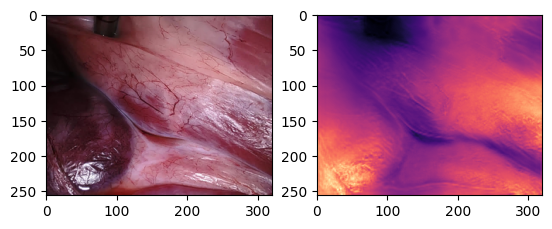

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import networks
from layers import disp_to_depth

device = "cuda" if torch.cuda.is_available() else "cpu"
encoder_path = "../womin_frames/mdp/models/weights_19/encoder.pth"
decoder_path = "../womin_frames/mdp/models/weights_19/depth.pth"
encoder_dict = torch.load(encoder_path, map_location=device)
encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.DepthDecoder(encoder.num_ch_enc, scales=range(4))

model_dict = encoder.state_dict()
encoder.load_state_dict({k: v for k, v in encoder_dict.items() if k in model_dict})
depth_decoder.load_state_dict(torch.load(decoder_path, map_location=device))

encoder.to(device)
encoder.eval()
depth_decoder.to(device)
depth_decoder.eval()
sample = sample.to(device)

output = depth_decoder(encoder(sample))
pred_disp, _ = disp_to_depth(output[("disp", 0)], 1e-3, 150)
pred_disp = pred_disp.cpu()[:, 0].detach().numpy()
sample = sample.cpu()
vmax = np.percentile(pred_disp, 95)

plt.subplot(121), plt.imshow(sample[0].permute(1,2,0))
plt.subplot(122), plt.imshow(pred_disp[0], cmap='magma', vmax=vmax)

In [19]:
sample[0].permute(1,2,0).shape, output[("disp", 0)][0].shape

(torch.Size([256, 320, 3]), torch.Size([1, 256, 320]))

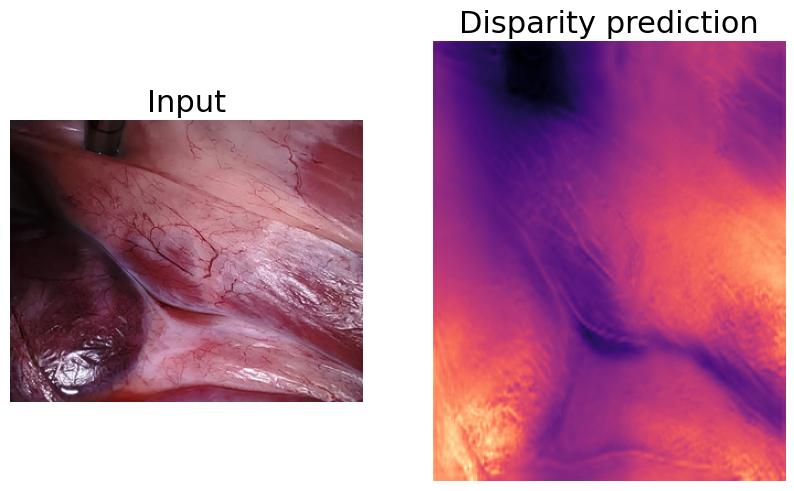

In [23]:
disp = output[("disp", 0)]
_, _, original_width, original_height = sample.size()
disp_resized = torch.nn.functional.interpolate(disp,
    (original_height, original_width), mode="bilinear", align_corners=False)

# Saving colormapped depth image
disp_resized_np = disp_resized.squeeze().detach().cpu().numpy()
vmax = np.percentile(disp_resized_np, 95)

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(sample[0].permute(1,2,0))
plt.title("Input", fontsize=22)
plt.axis('off')

plt.subplot(122)
plt.imshow(disp_resized_np[0], cmap='magma', vmax=vmax)
plt.title("Disparity prediction", fontsize=22)
plt.axis('off');

In [24]:
print(sample.shape)
print(sample[0].shape)

print(pred_disp.shape)
print(pred_disp[0].shape)

torch.Size([8, 3, 256, 320])
torch.Size([3, 256, 320])
(8, 256, 320)
(256, 320)


(<Axes: >, <matplotlib.image.AxesImage at 0x7c6d98949cf0>)

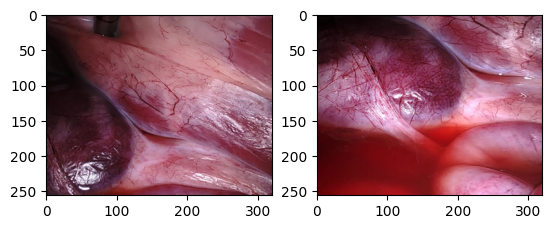

In [25]:
import matplotlib.pyplot as plt

plt.subplot(121), plt.imshow(sample[0].permute(1,2,0))
plt.subplot(122), plt.imshow(sample[1].permute(1,2,0))

In [ ]:
!python evaluate_depth.py --load_weights_folder ../womin_frames/mdp/models/weights_19 --eval_mono  --eval_split endovis --data_path ../frames/d3k4 --max_depth 150.0

-> Loading weights from ../womin_frames/mdp/models/weights_19
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  53
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and 

In [ ]:
!python evaluate_depth.py --load_weights_folder ../womin_frames/mdp/models/weights_19 --eval_mono  --eval_split endovis --data_path ../frames/d3k4 --max_depth 150.0

-> Loading weights from ../womin_frames/mdp/models/weights_19
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  53
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and 

In [ ]:
!python evaluate_depth.py --load_weights_folder ../womin_frames/mdp/models/weights_19 --eval_mono  --eval_split endovis --data_path ../frames/d3k4 --max_depth 150.0

-> Loading weights from ../womin_frames/mdp/models/weights_19
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  53
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and 

In [ ]:
!python evaluate_pose.py --data_path ../frames/d3k4 --eval_split endovis --load_weights_folder ../womin_frames/mdp/models/weights_19

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  70
-> Computing pose predictions

   Trajectory error: 0.1257, std: 0.0793


   Rotation error: 0.0960, std: 0.0541



In [ ]:
!python evaluate_pose.py --data_path ../frames/d3k4 --eval_split endovis --load_weights_folder ../womin_frames/mdp/models/weights_19

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  70
-> Computing pose predictions
-> Predicted pose saved

   Trajectory error: 0.1257, std: 0.0793


   Rotation error: 0.0960, std: 0.0541



In [ ]:
!python evaluate_pose.py --data_path ../frames/d3k4 --eval_split endovis --load_weights_folder ../womin_frames/mdp/models/weights_19

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  70
-> Computing pose predictions

   Trajectory error: 0.1285, std: 0.0755


   Rotation error: 0.0117, std: 0.0066



In [28]:
!ls ../womin_frames/mdp/models/weights_19/pose_encoder.pth

../womin_frames/mdp/models/weights_19/pose_encoder.pth


In [29]:
!python evaluate_pose.py --data_path ../frames/d3k4 --eval_split endovis --load_weights_folder ../womin_frames/mdp/models/weights_19

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
total samples:  833
batch size:  12
number of batch / epoch:  70
pose_encoder_path: ../womin_frames/mdp/models/weights_19/pose_encoder.pth
pose_decoder_path ../womin_frames/mdp/models/weights_19/pose.pth
-> Computing pose predictions

   Trajectory error: 0.1257, std: 0.0793


   Rotat

In [53]:
%cd /content/Long-Term_Reprojection_Loss
import os
import torch
import networks
import numpy as np

from torch.utils.data import DataLoader
from layers import transformation_from_parameters
from utils import readlines
from options import MonodepthOptions
from datasets import SCAREDRAWDataset

options = MonodepthOptions()
opt = options.parse()

opt.data_path = '../frames/d3k4'
opt.eval_split = 'endovis'
opt.load_weights_folder = '../womin_frames/mdp/models/weights_19'

pose_encoder_path = os.path.join(opt.load_weights_folder, "pose_encoder.pth")
pose_decoder_path = os.path.join(opt.load_weights_folder, "pose.pth")


device = "cuda" if torch.cuda.is_available() else "cpu"

pose_encoder = networks.ResnetEncoder(opt.num_layers, False, 2)
# print('bef:', pose_encoder.encoder.conv1.weight[0,0,0])
pose_encoder.load_state_dict(torch.load(pose_encoder_path, map_location=device))
# print('aft:', pose_encoder.encoder.conv1.weight[0,0,0])

pose_decoder = networks.PoseDecoder(pose_encoder.num_ch_enc, 1, 2)
# print('bef', pose_decoder.net[0].weight[0,0:10])
pose_decoder.load_state_dict(torch.load(pose_decoder_path, map_location=device))
# print('aft', pose_decoder.net[0].weight[0,0:10])

pose_encoder.to(device)
pose_encoder.eval()
pose_decoder.to(device)
pose_decoder.eval()

pred_poses = []


filenames = readlines(
    os.path.join( "splits", "endovis", "test_files_sequence2.txt"))

dataset = SCAREDRAWDataset(opt.data_path, filenames, opt.height, opt.width,
                            [0, 1], 4, is_train=False)
dataloader = DataLoader(dataset, opt.batch_size, shuffle=False,
                        num_workers=opt.num_workers, pin_memory=True, drop_last=False)


opt.frame_ids = [0, 1]  # pose network only takes two frames as input

with torch.no_grad():
    for inputs in dataloader:
        for key, ipt in inputs.items():
            inputs[key] = ipt.to(device)

        all_color_aug = torch.cat([inputs[("color", 1, 0)], inputs[("color", 0, 0)]], 1)

        features = [pose_encoder(all_color_aug)]
        axisangle, translation = pose_decoder(features)
        print('inputs:', inputs['K',0].shape, inputs['K',0][0])
        print('inputs[color,0,0]:', inputs['color',0,0].shape, inputs['color',0,0][0,0,0,0:10])
        print('feature',features[0][0].shape, features[0][0].sum())
        pred_poses.append(
            transformation_from_parameters(axisangle[:, 0], translation[:, 0]).cpu().numpy())
        break


/content/Long-Term_Reprojection_Loss
inputs: torch.Size([12, 4, 4]) tensor([[524.8000,   0.0000, 320.0000,   0.0000],
        [  0.0000, 195.8400,  96.0000,   0.0000],
        [  0.0000,   0.0000,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   1.0000]], device='cuda:0')
inputs[color,0,0]: torch.Size([12, 3, 192, 640]) tensor([0.3490, 0.3490, 0.3490, 0.3490, 0.3529, 0.3725, 0.3804, 0.3686, 0.3725,
        0.3725], device='cuda:0')
feature torch.Size([12, 64, 96, 320]) tensor(15710910., device='cuda:0')


In [39]:
features[0][0].shape, features[0][0].sum()

(torch.Size([12, 64, 96, 320]), tensor(15710910., device='cuda:0'))

In [47]:
inputs['K',0].shape, inputs['K',0][0]

(torch.Size([12, 4, 4]),
 tensor([[524.8000,   0.0000, 320.0000,   0.0000],
         [  0.0000, 195.8400,  96.0000,   0.0000],
         [  0.0000,   0.0000,   1.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   1.0000]], device='cuda:0'))

In [48]:
inputs['inv_K',0].shape, inputs['inv_K',0][0]

(torch.Size([12, 4, 4]),
 tensor([[ 1.9055e-03,  8.4514e-11, -6.0976e-01,  0.0000e+00],
         [ 1.5432e-12,  5.1062e-03, -4.9020e-01,  0.0000e+00],
         [-9.6896e-11, -1.1344e-10,  1.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]], device='cuda:0'))

In [51]:
inputs['color',0,0].shape, inputs['color',0,0][0,0,0,0:10]

(torch.Size([12, 3, 192, 640]),
 tensor([0.3490, 0.3490, 0.3490, 0.3490, 0.3529, 0.3725, 0.3804, 0.3686, 0.3725,
         0.3725], device='cuda:0'))

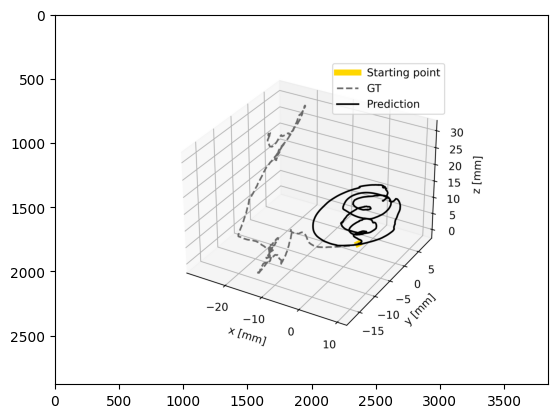

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!python visualize_pose.py
img = mpimg.imread('vo_sq2.png')
imgplot = plt.imshow(img)
plt.show()

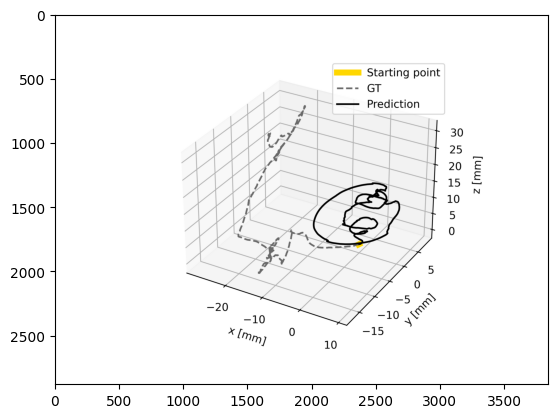

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!python visualize_pose.py
img = mpimg.imread('vo_sq2.png')
imgplot = plt.imshow(img)
plt.show()